# Time-Frequency Transform in Signal Processing

Time-frequency transform is a powerful technique in signal processing that provides a detailed analysis of how the frequency content of a signal changes over time. Unlike traditional Fourier analysis, which provides a static representation of frequency content, time-frequency transforms offer insights into the dynamic nature of signals, making them particularly useful for analyzing non-stationary signals.

#### Fourier Transform vs. Time-Frequency Transform

- **Fourier Transform**: Fourier analysis decomposes a signal into its frequency components, providing information about the amplitude and phase of each frequency present in the signal. However, it does not capture how the frequency content evolves over time, making it less suitable for analyzing non-stationary signals.

- **Time-Frequency Transform**: Time-frequency transforms, such as the Short-Time Fourier Transform (STFT), Wavelet Transform, and Wigner-Ville Distribution, overcome this limitation by providing a time-varying representation of frequency content. They divide the signal into short segments and analyze the frequency content of each segment separately, allowing for the detection of transient events and frequency modulations.

#### Types of Time-Frequency Transforms

1. **Short-Time Fourier Transform (STFT)**: STFT computes the Fourier transform of short segments of a signal, providing a time-varying representation of frequency content. It is widely used for tasks such as audio processing, speech recognition, and vibration analysis.

2. **Wavelet Transform**: Wavelet transform decomposes a signal into wavelet coefficients at different scales and positions. It offers excellent time and frequency localization, making it suitable for analyzing signals with varying frequency components.
 
 

Overall, time-frequency transforms play a crucial role in analyzing non-stationary signals across various domains, providing valuable insights into the dynamic behavior of signals over time and frequency.

In [1]:
# Importing the sys module to manipulate the Python runtime environment
import sys

# Adding a specific path to the beginning of the sys.path list
# This path points to a directory containing Python packages
# This is typically done to ensure that the desired version of a package is used
# In this case, the path points to the site-packages directory of the igwn-py39 environment
sys.path = ['/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages'] + sys.path

In [2]:
# Importing the pyplot module from the matplotlib library and aliasing it as plt
from matplotlib import pyplot as plt
# Set matplotlib configuration parameters
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.grid'] = False
 

# Importing the gwpy library, which provides tools for gravitational wave data analysis
import gwpy

# Importing the TimeSeries class from the gwpy.timeseries module
from gwpy.timeseries import TimeSeries

# Importing the NumPy library and aliasing it as np
import numpy as np

# Importing the Pandas library and aliasing it as pd
import pandas as pd

# Importing the seaborn library for statistical data visualization
import seaborn as sns


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/cvmfs/software.igw

## Select a segment of the time series

In [3]:
import lal
def read_without_warnings(cachefile, channel, **kwargs):
    """Reads cache file while suppressing spurious LAL warnings.
    Wraps gwpy.timeseries.TimeSeries.read

    Args:
        cachefile (str): path to cache file
        channel (str): Channel name
        **kwargs: additional arguments passed to TimeSeries.read
    """
    prev_level = lal.GetDebugLevel()
    lal.ClobberDebugLevel(0)
    result = TimeSeries.read(cachefile, channel, **kwargs)
    lal.ClobberDebugLevel(prev_level)
    return result

def get_strain(tc, t_before = 4, t_after = 1):
    start_time = tc - t_before
    end_time = tc + t_after
    h = read_without_warnings('../caches/E1.lcf','E1:STRAIN',start=start_time, end=end_time)
    return h

In [4]:
# Importing the Pandas library and aliasing it as pd
import pandas as pd

# Reading a CSV file containing metadata about signals
# The file is assumed to be located one level up in the directory structure
df = pd.read_csv('../metadata/list_mdc1.txt', sep=' ')
df_snr=df[df['snrET_Opt']>30]
signals=df_snr.sort_values(by=['snrET_Opt'],ascending=True)
# Choosing the top few signals (Nsig = 4)
Nsig = 10
top_sigs = signals.iloc[:Nsig]

# Iterating over the top signals and printing relevant information
for idx, pars in top_sigs.iterrows():
    # Printing information about each signal
    print(f'Inj {int(pars["#"])}, tc {pars["tc"]}, SNR {pars["snrET_Opt"]}')

Inj 34127, tc 1001297752.39582, SNR 30.020175
Inj 62947, tc 1002402371.92937, SNR 30.029532
Inj 48986, tc 1001866809.15715, SNR 30.036475
Inj 31770, tc 1001209227.2914, SNR 30.051887
Inj 50921, tc 1001941825.40383, SNR 30.060256
Inj 44039, tc 1001675298.80277, SNR 30.065553
Inj 38722, tc 1001473608.63336, SNR 30.071649
Inj 24676, tc 1000934112.77494, SNR 30.074627
Inj 14461, tc 1000552258.75587, SNR 30.085453
Inj 43975, tc 1001672642.80045, SNR 30.086292


In [5]:
tc=1001675298.80277
h = get_strain(tc, t_before=5, t_after=1)

In [6]:
hw=h.whiten(4,2)

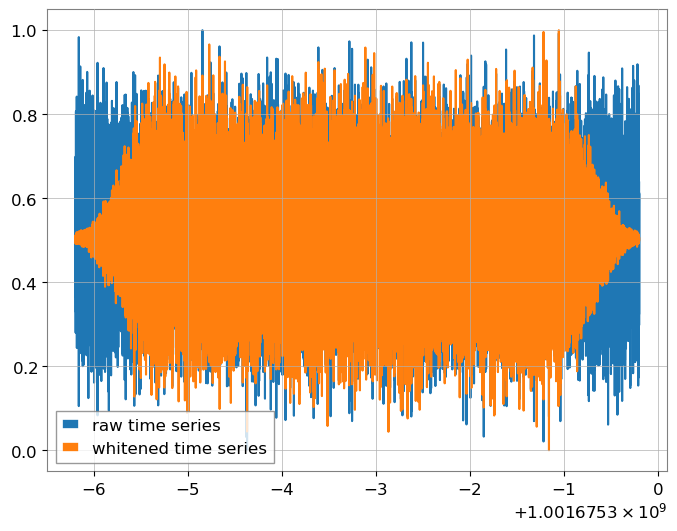

In [7]:
plt.figure()
# Normalize the 'h' array to be in the range [0, 1]
h_norm = (h - np.min(h)) / (np.max(h) - np.min(h))

# Normalize the 'hw' array to be in the range [0, 1]
hw_norm = (hw - np.min(hw)) / (np.max(hw) - np.min(hw))

# Plot the normalized 'h' array as the raw time series
plt.plot(h_norm, label='raw time series')

# Plot the normalized 'hw' array as the whitened time series
plt.plot(hw_norm, label='whitened time series')

# Add a legend to the plot indicating which line corresponds to which data
plt.legend()

# Display the plot
plt.show()

In [8]:
# Import necessary libraries and modules
import matplotlib.pyplot as plt
import IPython
import IPython.display
import matplotlib as mpl
from matplotlib import cm
from scipy import signal
from matplotlib.colors import LogNorm
from PIL import Image

# Set matplotlib configuration parameters
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Import NumPy library
import numpy as np

# Import additional libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.colors import LogNorm

def prepareImage(y, fs, title):
    """
    Create and display a spectrogram plot using the Short-Time Fourier Transform (STFT).

    Parameters:
        y (numpy.ndarray): Signal data.
        fs (float): Sampling frequency.
        title (str): Title for the plot.

    Returns:
        None
    """
    # Calculate the spectrogram using the Short-Time Fourier Transform (STFT)
    f, t, Sxx = signal.spectrogram(y, fs)
    
    # Create a pseudocolor mesh plot using the spectrogram data
    plt.pcolormesh(t, f, Sxx, cmap='viridis', shading='gouraud', alpha=0.95)
    
    # Set the y-axis scale to logarithmic
    plt.yscale('log')
    
    # Set the y-axis limits to be between 10 Hz and half of the sampling frequency
    plt.ylim(10, fs/2)
    
    # Set the title for the plot
    plt.title(str(title))
    
    # Set labels for the x and y axes
    plt.xlabel('Time (secs)')
    plt.ylabel('Frequency (Hz)')
    
    # Add a colorbar to the plot for visualization
    plt.colorbar()
    
    # Display the spectrogram plot
    plt.show()

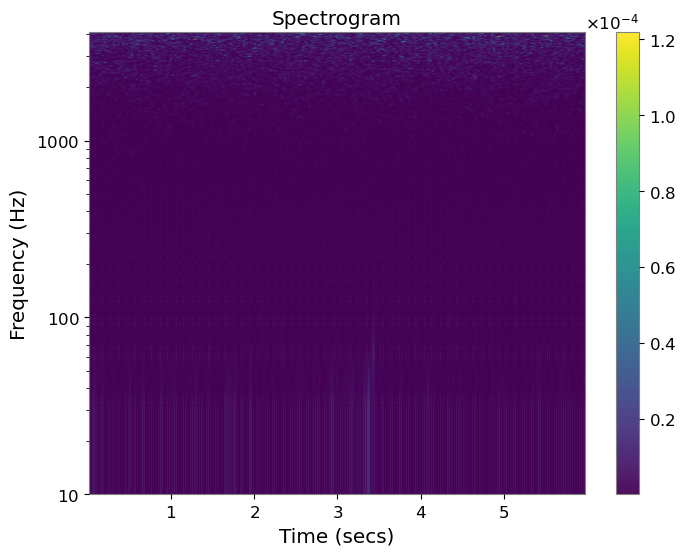

In [9]:
fs=8192
prepareImage(h_norm,fs,title="Spectrogram")

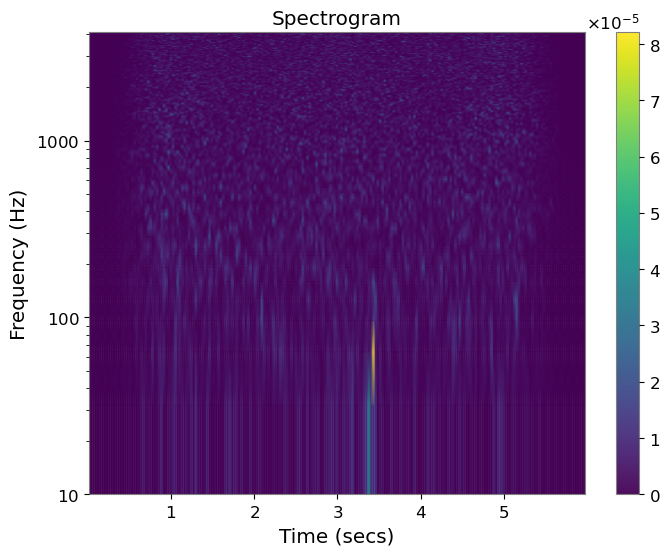

In [10]:
prepareImage(hw_norm,fs,title="Spectrogram")

## Wavelet transform

###  SSqueezepy: Time-Frequency Analysis Package 
[[github repo ]https://github.com/OverLordGoldDragon/ssqueezepy/tree/master]
SSqueezepy is a Python package designed for time-frequency analysis, offering a range of tools and algorithms for signal processing tasks. This package primarily focuses on synchrosqueezing transform (SST) methods, which are powerful techniques used in various domains such as signal processing, machine learning, and neuroscience.

 

In [11]:
!pip install ssqueezepy --user

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


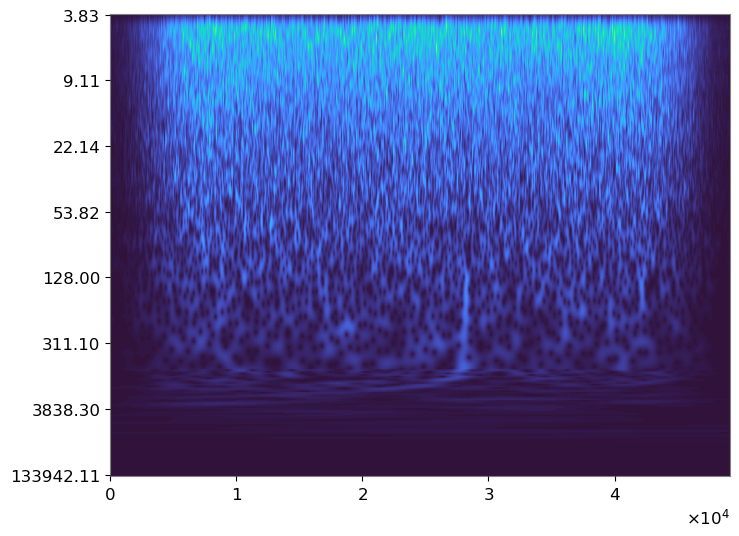

In [12]:
from ssqueezepy import cwt  # Import the continuous wavelet transform function from the ssqueezepy package
from ssqueezepy import imshow  # Import the imshow function from the ssqueezepy package

def prepareImage_cwt(y, fs):
    """
    Compute and visualize the continuous wavelet transform (CWT) of a given signal.

    Parameters:
    - y: The input signal to be analyzed.
    - fs: The sampling frequency of the signal.

    Returns:
    None
    """
    # Compute the continuous wavelet transform (CWT) using the Morlet wavelet
    Wx, scales = cwt(y, 'morlet')
    
    # Visualize the CWT coefficients using imshow
    imshow(Wx, yticks=scales, abs=1)
    
# Call the function to prepare and visualize the CWT of the input signal
prepareImage_cwt(hw_norm, fs)


##  Q-transform

The Q-transform is a mathematical technique used for time-frequency analysis, particularly adept at handling signals with rapidly changing frequencies or non-stationary characteristics. At its core, the Q-transform involves decomposing a signal into its constituent components in the time-frequency domain, providing a detailed representation of how the signal's frequency content evolves over time.

 